In [27]:
import cv2
import json
import os
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

In [15]:
f1 = '{"file": "213894.jpg", "result": [{"uniq_id": "42", "box": [215.04502868652344, 69.72772979736328, 597.3473510742188, 201.969970703125]}]}'
f2 = '{"file": "210622.jpg", "result": [{"uniq_id": "42", "box": [51.95195007324219, 13.323323249816895, 344.6146240234375, 122.33232879638672]}]}'
f3 = '{"file": "198359.jpg", "result": [{"uniq_id": "42", "box": [104.78077697753906, 31.985984802246094, 431.1471252441406, 190.68568420410156]}]}'
f4 = '{"file": "37639.jpg", "result": [{"uniq_id": "42", "box": [17.137136459350586, 13.070070266723633, 385.5856018066406, 194.86285400390625]}]}'
f5 = '{"file": "297240.jpg", "result": [{"uniq_id": "42", "box": [0.0, 0.0, 1709.0, 1217.0]}]}'
f6 = '{"file": "205517.jpg", "result": [{"uniq_id": "42", "box": [47.05405044555664, 0.0, 517.5946044921875, 157.4084014892578]}]}'
f7 = '{"file": "218734.jpg", "result": [{"uniq_id": "42", "box": [106.1851806640625, 3.675675630569458, 823.3703002929688, 172.7567596435547]}]}'
f8 = '{"file": "233032.jpg", "result": [{"uniq_id": "42", "box": [118.52251434326172, 49.741737365722656, 451.7597351074219, 192.90089416503906]}]}'
f9 = '{"file": "292913.jpg", "result": [{"uniq_id": "42", "box": [0.0, 0.0, 1726.0, 1207.0]}]}'
f10 = '{"file": "208776.jpg", "result": [{"uniq_id": "42", "box": [26.021020889282227, 43.3153190612793, 504.8078308105469, 143.18118286132812]}]}'

In [16]:
f = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10]

In [43]:
imgs = []
for object in f:
    data = json.loads(object)
    file_name, result = data['file'], data['result']
    path = os.path.join('/mnt/win_share/MLW/zettel', file_name)
    img = np.asarray(Image.open(path, mode="r"))
    if (int(result[0]["box"][0]), int(result[0]["box"][1])) == (0,0):
        cv2.rectangle(
            img,
            (int(result[0]["box"][0]) + 3, int(result[0]["box"][1]) + 3),
            (int(result[0]["box"][2]), int(result[0]["box"][3])),
            (255, 0, 0),
            10
        )
    else:
        cv2.rectangle(
            img,
            (int(result[0]["box"][0]), int(result[0]["box"][1])),
            (int(result[0]["box"][2]), int(result[0]["box"][3])),
            (0, 255, 0),
            3
        )
    imgs.append((data['file'], img))

    

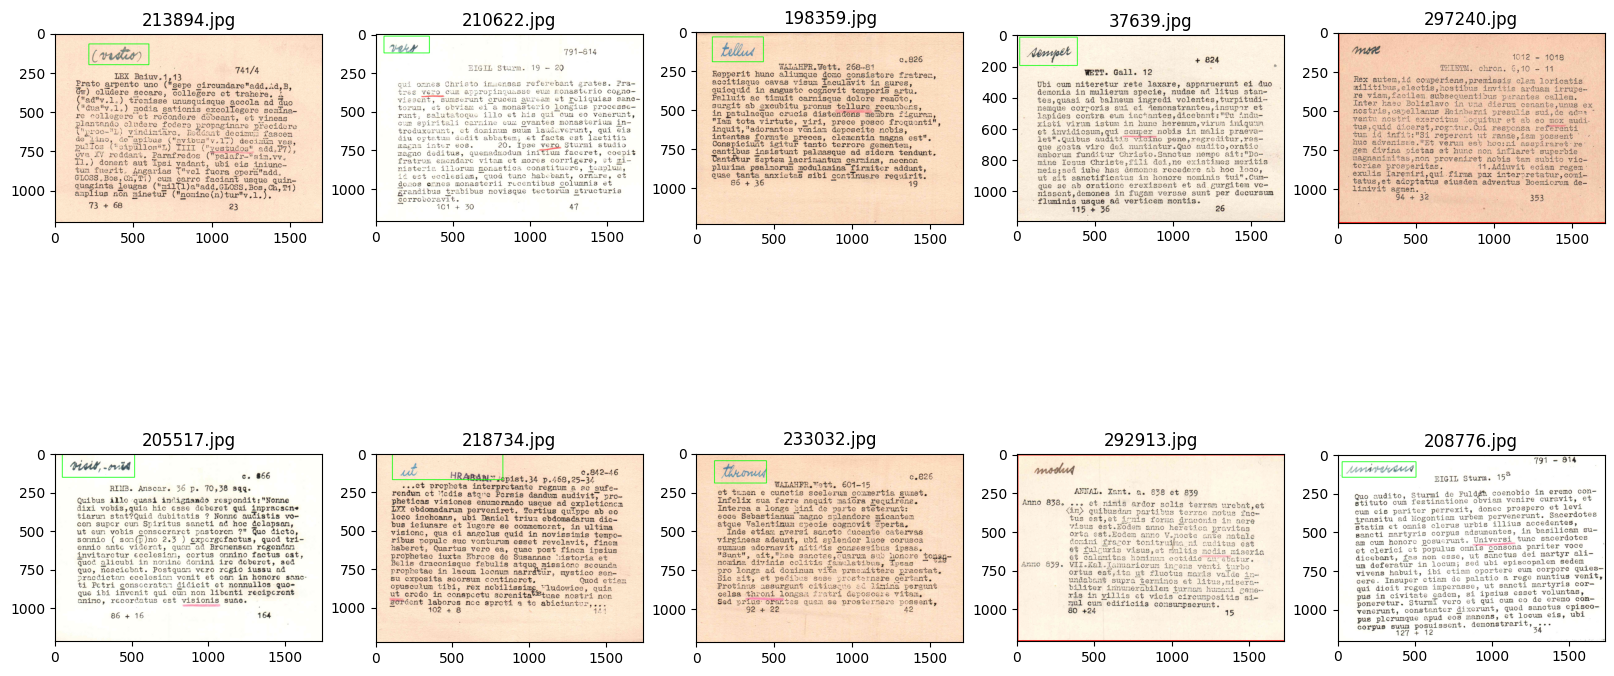

In [44]:
columns = 5
rows = 2
fig = plt.figure(figsize=(20, 10))
for index, (filename, img) in enumerate(imgs):
   fig.add_subplot(rows, columns, index + 1)
   fig.axes[index].set_title(filename)
   plt.imshow(img)